# This notebook illustrates the Gaussian Process Regression

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from matplotlib import pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
# The underlying function
def f(x):
    return 0.01*(x-1.5)*(x-1.5)*(x+1.0)

In [3]:
X = np.linspace(-5,5,10)
Y = f(X)
noisy_Y = Y+np.random.randn(len(Y))*0.1

kernel = C(1.0, (1e-3, 1e3)) * RBF(100, (1e-6, 1e6))

model = GPR(kernel,n_restarts_optimizer=20)

model.fit(X.reshape(-1,1),noisy_Y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=100),
                         n_restarts_optimizer=20)

In [4]:
model.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel__k1': 1**2,
 'kernel__k2': RBF(length_scale=100),
 'kernel__k1__constant_value': 1.0,
 'kernel__k1__constant_value_bounds': (0.001, 1000.0),
 'kernel__k2__length_scale': 100,
 'kernel__k2__length_scale_bounds': (1e-06, 1000000.0),
 'kernel': 1**2 * RBF(length_scale=100),
 'n_restarts_optimizer': 20,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [5]:
model.kernel_.get_params()['k1__constant_value']

5.437288756531836e-01

In [6]:
model.kernel_.get_params()['k2__length_scale']

1.4146949937822384

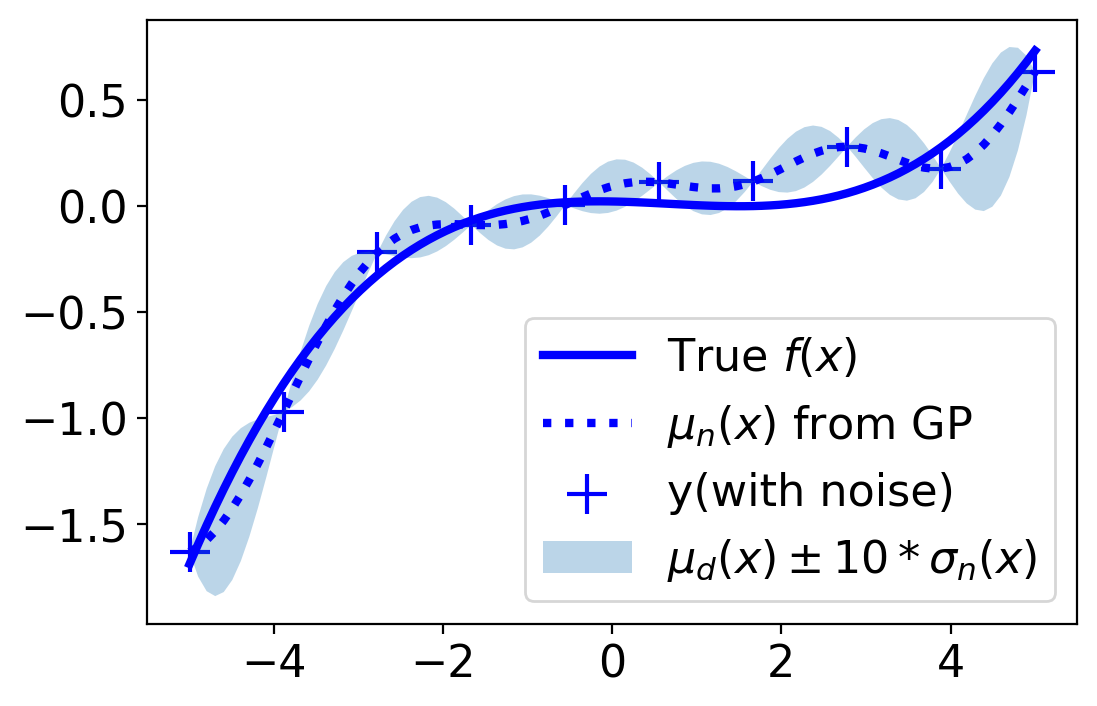

In [7]:
full_X = np.linspace(-5,5,100)
mu,std= model.predict(full_X.reshape(-1,1),return_std=True)
plt.rc('font',size=16)
plt.figure(dpi=200)

plt.plot(full_X,f(full_X),label=r'True $f(x)$',lw=3,color='b')
plt.scatter(X,noisy_Y,marker='+',label=r'y(with noise)',s=200,color='b')

plt.plot(full_X,mu,label=r'$\mu_n(x)$ from GP',lw=3,ls='dotted',color='b')
plt.fill_between(full_X,mu+std*10,mu-std*10,alpha=0.3,label=r'$\mu_d(x)\pm 10*\sigma_n(x)$')

plt.legend()
plt.savefig('GPIllustration.png')

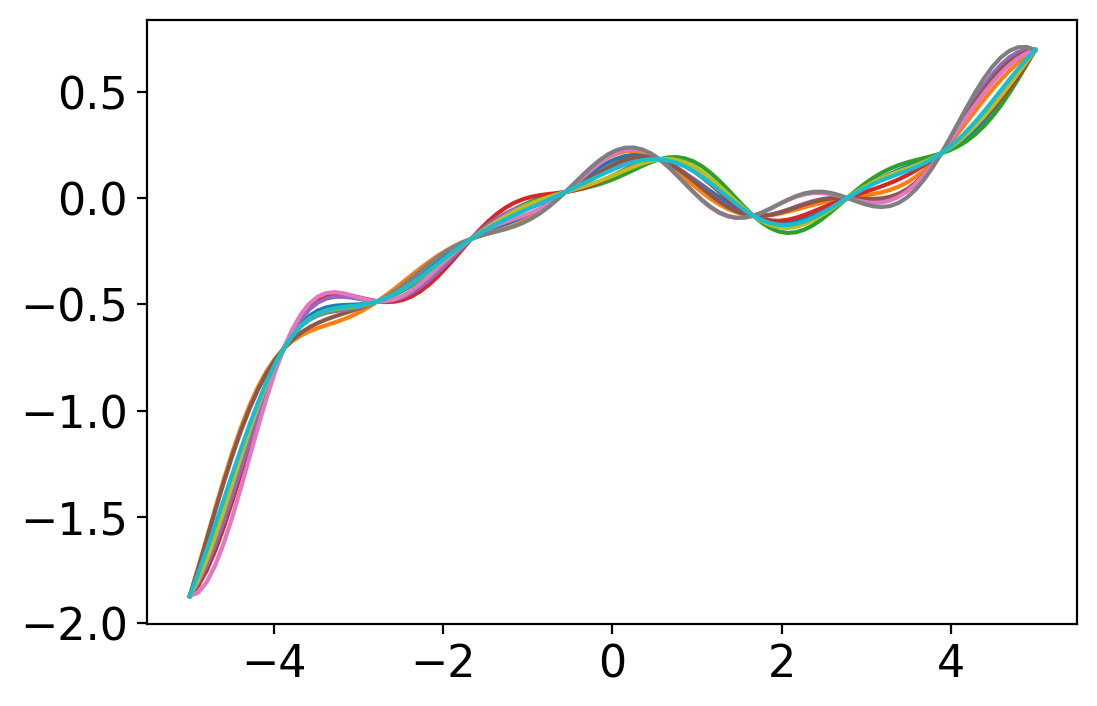

In [288]:
plt.rc('font',size=16)
plt.figure(dpi=200)
for i in range(10):
    sample=model.sample_y(full_X.reshape(-1,1),n_samples=1,random_state=np.random.randint(2000))

    plt.plot(full_X,sample)
plt.savefig('GPSampleCurves.png')

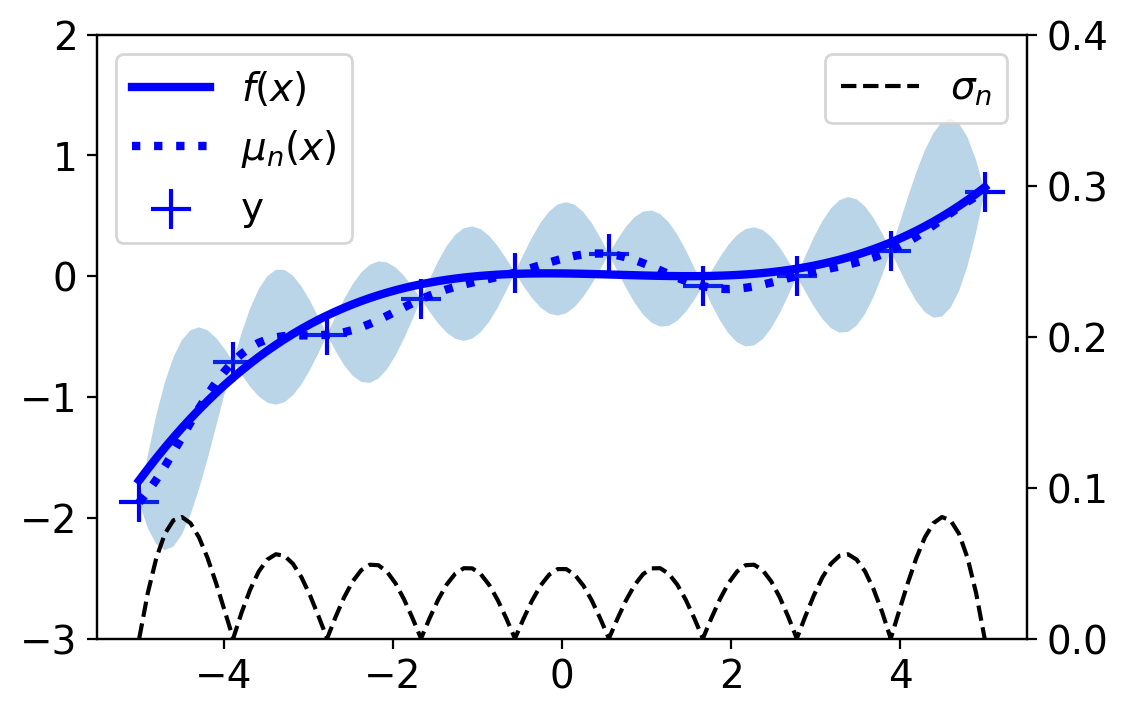

In [324]:
full_X = np.linspace(-5,5,100)
mu,std= model.predict(full_X.reshape(-1,1),return_std=True)
plt.rc('font',size=14)
plt.figure(dpi=200)

plt.plot(full_X,f(full_X),label=r'$f(x)$',lw=3,color='b')
plt.scatter(X,noisy_Y,marker='+',label=r'y',s=200,color='b')

plt.plot(full_X,mu,label=r'$\mu_n(x)$',lw=3,ls='dotted',color='b')
plt.fill_between(full_X,mu+std*10,mu-std*10,alpha=0.3)

plt.ylim(-3,2)
plt.legend(ncol=1)

ax2 = plt.gca().twinx()
ax2.plot(full_X,std,label=r'$\sigma_n$',color='black',ls='dashed')
ax2.set_ylim(0,0.4)

ax2.legend()
plt.savefig('GPIllustration.png')